**Understanding the data:**

In [2]:
import numpy
import tensorflow #open source used for both ML and DL for computation
from tensorflow.keras.datasets import mnist #mnist dataset
from tensorflow.keras.models import Sequential #it is a plain stack of layers
from tensorflow.keras import layers #A Layer consists of a tensor- in tensor-out computat ion funct ion
from tensorflow.keras.layers import Dense, Flatten #Dense-Dense Layer is the regular deeply connected r
#faltten -used fot flattening the input or change the dimension
from tensorflow.keras.layers import Conv2D #onvoLutiona l Layer
from keras.optimizers import Adam #opt imizer
from keras. utils import np_utils #used for one-hot encoding
import matplotlib.pyplot as plt   #used for data visualization

In [3]:
(x_train, y_train), (x_test, y_test)=mnist.load_data ()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
print (x_train.shape) 
print (x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [5]:
x_train[2]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,  67, 232,  39,   0,   0,   0,
          0,   0],
       [  

In [6]:
y_train[2]

4

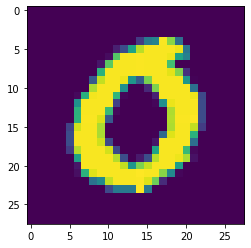

In [7]:
plt.imshow(x_train[8000])

Re-shapping the  data

In [8]:
x_train=x_train.reshape (60000, 28, 28, 1).astype('float32')
x_test=x_test.reshape (10000, 28, 28, 1).astype ('float32')

One-Hot encoding

In [9]:
number_of_classes = 12

In [10]:
y_train = np_utils.to_categorical (y_train, number_of_classes) 
y_test = np_utils.to_categorical (y_test, number_of_classes)

In [11]:
y_train[2]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

Add CNN layer

In [12]:
#create model
model=Sequential ()
#adding modeL Layer
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(32, (3, 3), activation = 'relu'))
#flatten the dimension of the image
model.add(Flatten())
#output layer with 10 neurons
model.add(Dense(number_of_classes,activation = 'softmax'))

Compile model

In [13]:
model.compile(loss= 'categorical_crossentropy', optimizer="Adam", metrics=['accuracy'])

Train the Model

In [14]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 201s 107ms/step - loss: 0.2247 - accuracy: 0.9505 - val_loss: 0.0987 - val_accuracy: 0.9714
Epoch 2/5
1875/1875 [==============================] - 194s 104ms/step - loss: 0.0678 - accuracy: 0.9790 - val_loss: 0.0729 - val_accuracy: 0.9779
Epoch 3/5
1875/1875 [==============================] - 190s 102ms/step - loss: 0.0468 - accuracy: 0.9851 - val_loss: 0.0751 - val_accuracy: 0.9792
Epoch 4/5
1875/1875 [==============================] - 197s 105ms/step - loss: 0.0386 - accuracy: 0.9874 - val_loss: 0.1457 - val_accuracy: 0.9668
Epoch 5/5
1875/1875 [==============================] - 191s 102ms/step - loss: 0.0307 - accuracy: 0.9904 - val_loss: 0.0881 - val_accuracy: 0.9774


Observing the Metrics

In [15]:
metrics = model.evaluate(x_test, y_test, verbose=0)
print("Metrics (Test loss &Test Accuracy) : ")
print(metrics)

Metrics (Test loss &Test Accuracy) : 
[0.08806239813566208, 0.977400004863739]


Test the Model

In [16]:
prediction=model.predict(x_test[6000:6001])
print(prediction)

1/1 [==============================] - 0s 94ms/step
[[5.5841422e-15 1.0780980e-13 1.4185509e-12 4.5770281e-07 1.8456072e-04
  3.2459857e-09 4.9605579e-16 1.7350651e-05 5.3874569e-06 9.9979228e-01
  3.1303732e-10 2.9965927e-10]]


In [17]:
import numpy as np
print(np.argmax(prediction, axis=1)) 
np.argmax(y_test[5000:5001]) 

[9]


3

Save the Model

In [18]:
model.save('models/project.h5')